In [1]:
import pandas as pd
import json
import requests
import numpy as np
from citipy import citipy as cp
import seaborn as sns
import openweathermapy as owm
import matplotlib.pyplot as plt
import random 
from config import api_key
import datetime
now = datetime.datetime.now()


In [2]:
# country_code = []
# great  = 1000
# cities = []
# while len(cities) < great:                                      
#     latitude = random.uniform(-1, 1) * 90                     
#     longitude = random.uniform(-1, 1) * 180                   
#     city = cp.nearest_city(latitude, longitude)           
#     if city not in cities:                                    
#         cities.append(city.city_name)                         
#         country_code.append((city.country_code).upper())
# print(len(cities))
# print(cities[0])



In [3]:
# Latitude ranges from -90 to 90 and Longitude ranges from -180 to 180
lat = list(np.arange(-90,90.01,0.01))
long = list(np.arange(-180,180.01,0.01))

# Setting Latitude and Longitude to ramdomly pick co-ordinates.
lat_samples=random.sample(lat,1500)
long_samples=random.sample(long,1500)

# Creating a dataframe from the randomly sample Latitude and Longitude
cities_df=pd.DataFrame({"Latitude":lat_samples,"Longitude":long_samples})

#Creating new columns City and Country for storing the details corresponding to the co-ordinates
cities_df["City"]=""
cities_df["Country"]=""

# Finding the city and the country code corresponding to the Latitude and Longitude
for index,row in cities_df.iterrows():
    city=cp.nearest_city(row["Latitude"], row["Longitude"])
    cities_df.set_value(index, "City", city.city_name)
    cities_df.set_value(index, "Country", city.country_code)

# Dropping the Latitude and Longitude as they are values of the nearest city and not the excat co-ordinates of the city
cities_df=cities_df.drop(cities_df.columns[[0, 1]], axis=1)

# Deleting duplicate values from the list of cities and keeping only the first
cities_df=cities_df.drop_duplicates(['City'], keep='first')

# Randomly sampling a list of 800 cities 
cities_df=cities_df.sample(n=10)

# Resetting the index of the cities list
cities_df=cities_df.reset_index(drop=True)

cities_df.head()

C:\Users\Anish Tendolkar\Anaconda3\envs\PythonData\lib\site-packages\ipykernel\__main__.py:19: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\Anish Tendolkar\Anaconda3\envs\PythonData\lib\site-packages\ipykernel\__main__.py:20: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


,City,Country
0,banda aceh,id
1,buala,sb
2,lebu,cl
3,nuevitas,cu
4,cockburn town,tc


In [8]:

# Create an "extracts" object to get the various parameter required to form the weather data table# Creat 
weather_data = []
url = "http://api.openweathermap.org/data/2.5/weather?" + api_key + "&units=imperial&q="
for index,row in cities_df.iterrows():  
    print("\nProcessing record %s|%s,%s"%((index+1),row["City"],row["Country"]))
    print("\n"+url+"%s,%s"%(row["City"].replace(" ","+"),row["Country"]))
    try:
        response = owm.get_current("%s,%s"%(row["City"],row["Country"]), **settings)
        # Appending the response to the weather_Data
        weather_data.append(response)
    except:
        print(" Skipping...")





Processing record 1|banda aceh,id

http://api.openweathermap.org/data/2.5/weather?bd5334bcd8f6438b0b15e4c22ea967e2&units=imperial&q=banda+aceh,id
 Skipping...

Processing record 2|buala,sb

http://api.openweathermap.org/data/2.5/weather?bd5334bcd8f6438b0b15e4c22ea967e2&units=imperial&q=buala,sb
 Skipping...

Processing record 3|lebu,cl

http://api.openweathermap.org/data/2.5/weather?bd5334bcd8f6438b0b15e4c22ea967e2&units=imperial&q=lebu,cl
 Skipping...

Processing record 4|nuevitas,cu

http://api.openweathermap.org/data/2.5/weather?bd5334bcd8f6438b0b15e4c22ea967e2&units=imperial&q=nuevitas,cu
 Skipping...

Processing record 5|cockburn town,tc

http://api.openweathermap.org/data/2.5/weather?bd5334bcd8f6438b0b15e4c22ea967e2&units=imperial&q=cockburn+town,tc
 Skipping...

Processing record 6|nagato,jp

http://api.openweathermap.org/data/2.5/weather?bd5334bcd8f6438b0b15e4c22ea967e2&units=imperial&q=nagato,jp
 Skipping...

Processing record 7|sinkat,sd

http://api.openweathermap.org/data/2

In [9]:
summary = ["name","sys.country","dt","coord.lat", "coord.lon","main.temp_max","main.humidity","wind.speed","clouds.all"]

data = [response(*summary) for response in weather_data]
column_names = ["City","Country","Date","Latitude", "Longitude","Temperature","Humidity","Wind speed","Cloudliness"]
weather_data = pd.DataFrame(data, columns=column_names)
weather_data.head()


,City,Country,Date,Latitude,Longitude,Temperature,Humidity,Wind speed,Cloudliness


In [10]:
def plotprops(xlabelname,ylabelname,xlimits):
    plt.xlabel(xlabelname)
    plt.ylabel(ylabelname)
    plt.xlim(xlimits)
    plt.title("%s vs %s (%s/%s/%s)"%(xlabelname,ylabelname,now.month,now.day,now.year),fontsize=14)
    plt.grid(True)

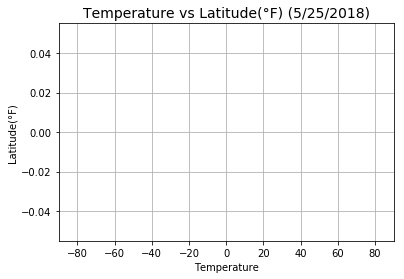

In [12]:
plt.scatter(x=weather_data["Latitude"],y=weather_data["Temperature"],facecolors="blue",edgecolors="black")
plotprops("Temperature","Latitude(°F)",[-90,90])
plt.show()